In [ ]:
import pandas as pd

# Load your dataset (update the path if needed) '
df = pd.read_csv("synthetic_beverage_sales_data.csv")

# Preview the first 5 rows
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


In [ ]:
# Shape and columns
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

# Data types
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Sample stats
df.describe(include='all').T


Shape: (8999910, 11)

Columns:
 Index(['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category',
       'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Region',
       'Order_Date'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB

Missing Values:
 Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order_ID,8999910,3000000,ORD1799745,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,8999910,10000,CUS4693,1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,8999910,2,B2C,5795405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,8999910,47,Hohes C Orange,337114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,8999910,4,Alcoholic Beverages,2251625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit_Price,8999910.0,NaN,NaN,NaN,5.818037,14.700501,0.32,1.05,1.75,3.21,169.53
Quantity,8999910.0,NaN,NaN,NaN,23.138134,26.893207,1.0,6.0,11.0,30.0,100.0
Discount,8999910.0,NaN,NaN,NaN,0.029729,0.044798,0.0,0.0,0.0,0.05,0.15
Total_Price,8999910.0,NaN,NaN,NaN,130.743659,509.694743,0.3,8.4,21.14,69.49,14295.3
Region,8999910,16,Hamburg,604054,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])


In [ ]:
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Week'] = df['Order_Date'].dt.isocalendar().week
df['Day'] = df['Order_Date'].dt.day
df['Day_Name'] = df['Order_Date'].dt.day_name()
df['Month_Name'] = df['Order_Date'].dt.strftime('%B')
df['Order_Weekday'] = df['Order_Date'].dt.weekday  # 0=Monday


In [ ]:
# Check high-end outliers
df[['Unit_Price', 'Quantity', 'Total_Price']].describe(percentiles=[.95, .99, .999])
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Year,Month,Week,Day,Day_Name,Month_Name,Order_Weekday
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23,2023,8,34,23,Wednesday,August,2
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23,2023,8,34,23,Wednesday,August,2
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23,2023,8,34,23,Wednesday,August,2
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23,2023,8,34,23,Wednesday,August,2
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23,2023,8,34,23,Wednesday,August,2


Total Sales Over Time (Monthly)

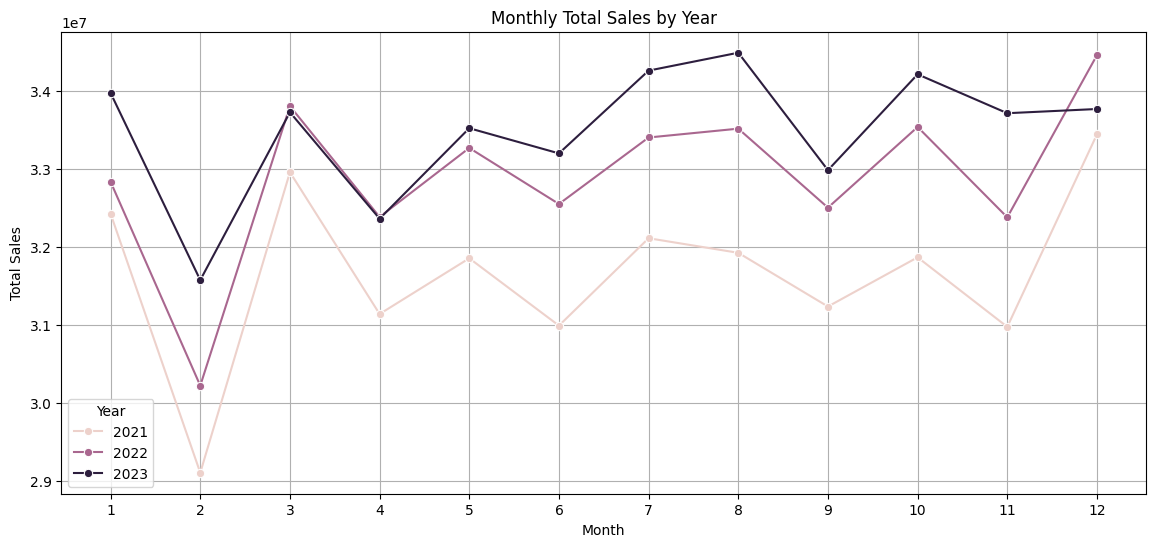

In [ ]:
monthly_sales = df.groupby(['Year', 'Month'])['Total_Price'].sum().reset_index();

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Price', hue='Year', marker='o')
plt.title('Monthly Total Sales by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

Top 10 Products by Revenue

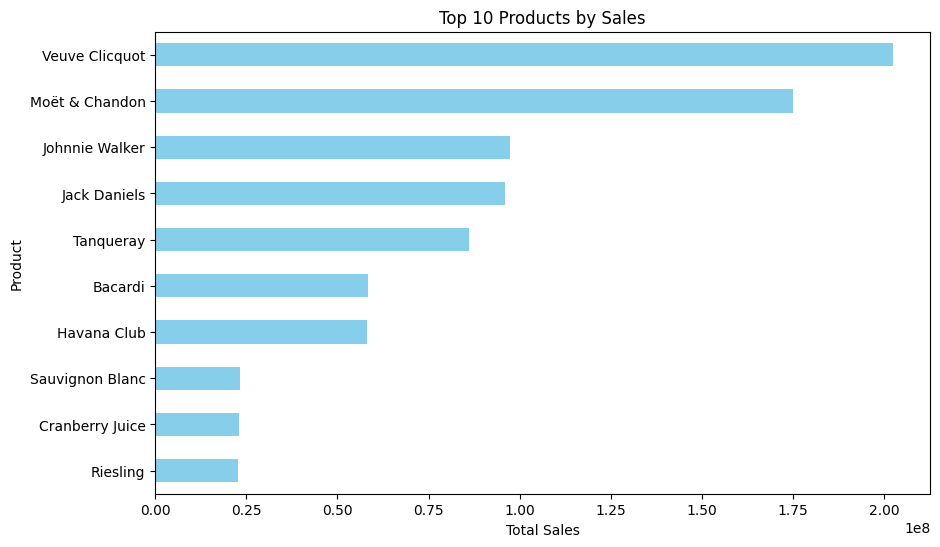

In [ ]:
top_products = df.groupby('Product')['Total_Price'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', figsize=(10,6), title='Top 10 Products by Sales', color='skyblue')
plt.xlabel('Total Sales')
plt.gca().invert_yaxis()
plt.show()


Category-Wise Sales

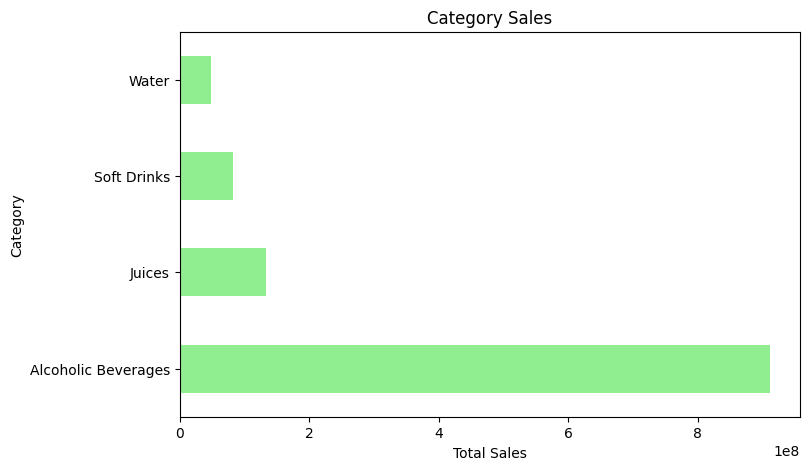

In [ ]:
category_sales = df.groupby('Category')['Total_Price'].sum().sort_values()

category_sales.plot(kind='barh', figsize=(8,5), color='lightgreen', title='Category Sales')
plt.xlabel('Total Sales')
plt.gca().invert_yaxis()
plt.show()


Region-Wise Revenue

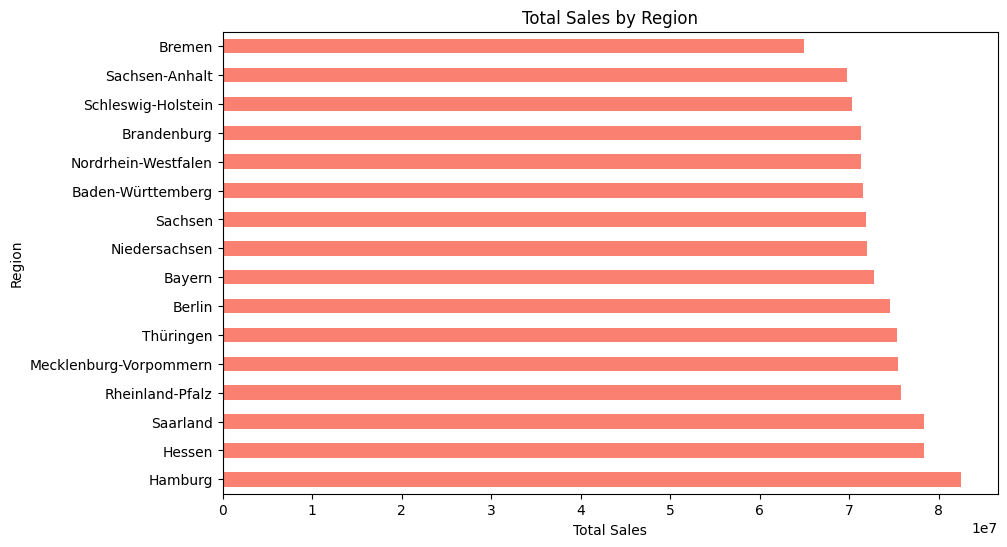

In [ ]:
region_sales = df.groupby('Region')['Total_Price'].sum().sort_values()

region_sales.plot(kind='barh', figsize=(10,6), color='salmon', title='Total Sales by Region')
plt.xlabel('Total Sales')
plt.gca().invert_yaxis()
plt.show()


Sales by Day of Week

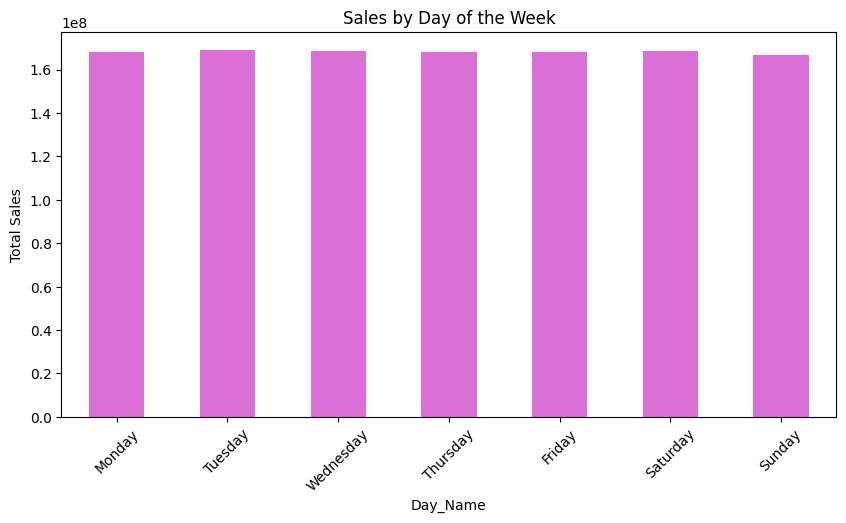

In [ ]:
weekday_sales = df.groupby('Day_Name')['Total_Price'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

weekday_sales.plot(kind='bar', figsize=(10,5), color='orchid', title='Sales by Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


Dynamic Pricing Simulator
Step 1: Create Revenue_per_Unit

In [ ]:
df['Revenue_per_Unit'] = df['Total_Price'] / df['Quantity']
df[['Unit_Price', 'Revenue_per_Unit']].describe()


,Unit_Price,Revenue_per_Unit
count,8.999910e+06,8.999910e+06
mean,5.818037e+00,5.642784e+00
std,1.470050e+01,1.433013e+01
min,3.200000e-01,2.950000e-01
25%,1.050000e+00,1.025979e+00
50%,1.750000e+00,1.710000e+00
75%,3.210000e+00,3.120000e+00
max,1.695300e+02,1.456110e+02


Step 2: Visualize Unit_Price vs Quantity

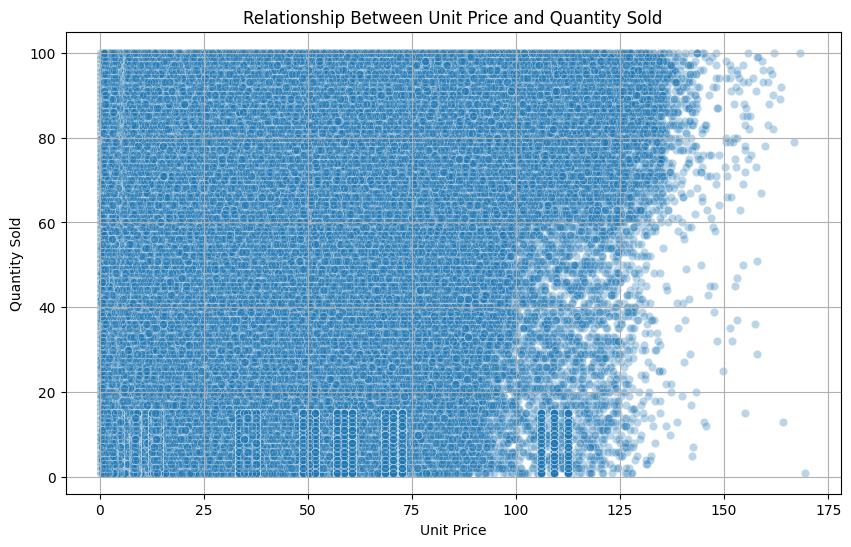

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Unit_Price', y='Quantity', alpha=0.3)
plt.title('Relationship Between Unit Price and Quantity Sold')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()


 Step 3: Correlation Check

In [ ]:
correlation = df[['Unit_Price', 'Quantity']].corr()
print(correlation)


            Unit_Price  Quantity
Unit_Price    1.000000  0.017295
Quantity      0.017295  1.000000


Step 4: Simple Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Drop rows where Unit_Price or Quantity is missing
df_clean = df[['Unit_Price', 'Quantity']].dropna()

# Prepare features and target
X = df_clean[['Unit_Price']]
y = df_clean['Quantity']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Output the slope and intercept
print(f"Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Coefficient (slope): 0.0316
Intercept: 22.9541


Step 5: Simulate Price Scenarios

In [ ]:
# Ensure clean data for prediction
df_model = df[['Unit_Price']].dropna()
df_clean = df.loc[df_model.index].copy()  # match indices

# Predict baseline quantity and revenue
df_clean['Predicted_Quantity'] = model.predict(df_clean[['Unit_Price']])
df_clean['Predicted_Revenue'] = df_clean['Predicted_Quantity'] * df_clean['Unit_Price']

# Simulate +5% price
df_clean['Unit_Price_+5'] = df_clean['Unit_Price'] * 1.05
df_clean['Quantity_+5'] = model.predict(df_clean[['Unit_Price_+5']].rename(columns={'Unit_Price_+5': 'Unit_Price'}))
df_clean['Revenue_+5'] = df_clean['Unit_Price_+5'] * df_clean['Quantity_+5']

# Simulate -5% price
df_clean['Unit_Price_-5'] = df_clean['Unit_Price'] * 0.95
df_clean['Quantity_-5'] = model.predict(df_clean[['Unit_Price_-5']].rename(columns={'Unit_Price_-5': 'Unit_Price'}))
df_clean['Revenue_-5'] = df_clean['Unit_Price_-5'] * df_clean['Quantity_-5']

# Compare total revenues
baseline = df_clean['Predicted_Revenue'].sum()
rev_up = df_clean['Revenue_+5'].sum()
rev_down = df_clean['Revenue_-5'].sum()

print(f"\nBaseline Revenue: {baseline:,.2f}")
print(f"Revenue with +5% Price: {rev_up:,.2f}")
print(f"Revenue with -5% Price: {rev_down:,.2f}")



Baseline Revenue: 1,273,091,726.11
Revenue with +5% Price: 1,340,483,049.13
Revenue with -5% Price: 1,206,056,282.78


 Promotion Effectiveness Analyzer
 Step 1: Create Discount Segments

In [ ]:
discount_bins = [-0.01, 0, 0.05, 0.10, 0.15]
discount_labels = ['0%', '0–5%', '5–10%', '10–15%']

df['Discount_Bin'] = pd.cut(df['Discount'], bins=discount_bins, labels=discount_labels)


Step 2: Compare Key Metrics by Discount Range

In [ ]:
promo_summary = df.groupby('Discount_Bin', observed=True).agg({
    'Total_Price': ['sum', 'mean'],
    'Quantity': ['sum', 'mean'],
    'Unit_Price': 'mean'
}).round(2)

promo_summary.columns = ['Total Revenue', 'Avg Order Value', 'Total Quantity', 'Avg Quantity', 'Avg Unit Price']
promo_summary.reset_index(inplace=True)

# Display the table
promo_summary


,Discount_Bin,Total Revenue,Avg Order Value,Total Quantity,Avg Quantity,Avg Unit Price
0,0%,2.750616e+08,47.46,46360564,8.00,5.92
1,0–5%,2.461163e+08,171.04,48815077,33.93,4.92
2,5–10%,4.929678e+08,356.04,85916100,62.05,6.05
3,10–15%,1.625355e+08,426.58,27149380,71.26,6.75


Step 3: Visualize Revenue by Discount Ran

/tmp/ipython-input-18-1552822342.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_summary, x='Discount_Bin', y='Total Revenue', palette='Blues')


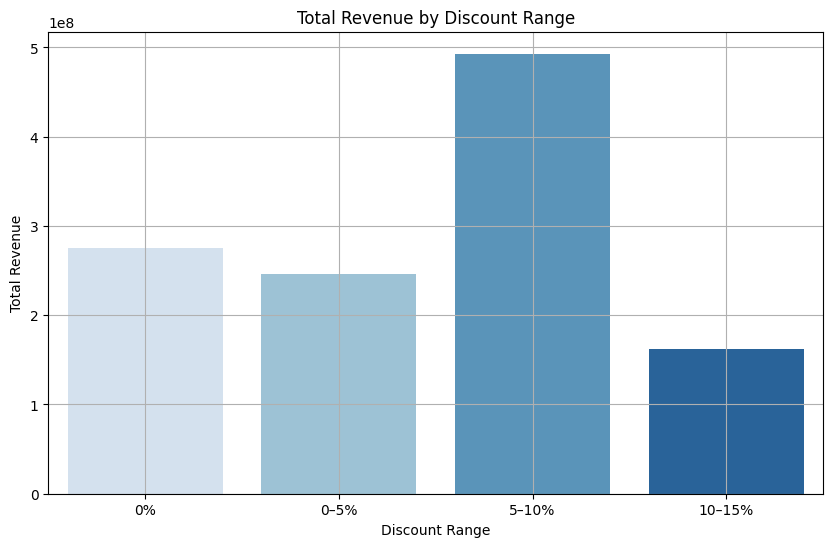

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=promo_summary, x='Discount_Bin', y='Total Revenue', palette='Blues')
plt.title('Total Revenue by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


Step 4: Visualize Quantity Sold by Discount Range

/tmp/ipython-input-19-799627997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_summary, x='Discount_Bin', y='Total Quantity', palette='Greens')


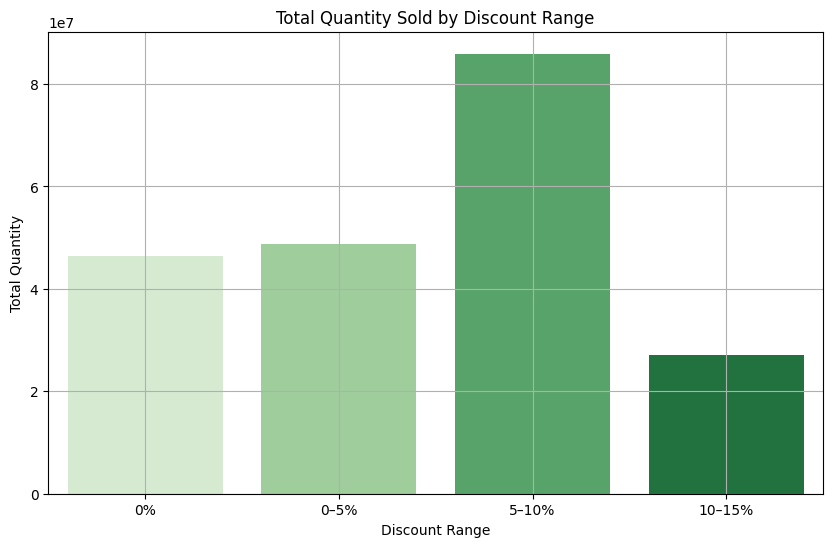

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=promo_summary, x='Discount_Bin', y='Total Quantity', palette='Greens')
plt.title('Total Quantity Sold by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()


Sales Forecasting Module

In [ ]:
!pip install prophet

Step 2: Prepare Monthly Sales Data

In [ ]:
# Ensure datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Aggregate monthly total sales
monthly_sales = df.groupby(pd.Grouper(key='Order_Date', freq='M'))['Total_Price'].sum().reset_index()

# Rename columns for Prophet
monthly_sales.columns = ['ds', 'y']
monthly_sales.head()


/tmp/ipython-input-21-2933620569.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Order_Date', freq='M'))['Total_Price'].sum().reset_index()


,ds,y
0,2021-01-31,32425429.08
1,2021-02-28,29110169.14
2,2021-03-31,32957436.50
3,2021-04-30,31142058.64
4,2021-05-31,31855490.12


Step 3: Fit the Prophet Model

In [ ]:
from prophet import Prophet

model = Prophet()
model.fit(monthly_sales)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnzcnv5fh/5zncscuu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnzcnv5fh/fueubqn4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74351', 'data', 'file=/tmp/tmpnzcnv5fh/5zncscuu.json', 'init=/tmp/tmpnzcnv5fh/fueubqn4.json', 'output', 'file=/tmp/tmpnzcnv5fh/prophet_modeliae0acf6/prophet_model-20250718184535.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:45:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:45:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Step 4: Make Future Predictions (Next 6 Months)

In [ ]:
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Display forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
36,2024-01-31,3.483902e+07,3.470229e+07,3.498259e+07
37,2024-02-29,3.051024e+07,3.036588e+07,3.067143e+07
38,2024-03-31,3.551125e+07,3.533916e+07,3.568780e+07
39,2024-04-30,3.368914e+07,3.347280e+07,3.391650e+07
40,2024-05-31,3.441395e+07,3.412205e+07,3.471124e+07
41,2024-06-30,3.347095e+07,3.310329e+07,3.383198e+07


Step 5: Visualize the Forecast

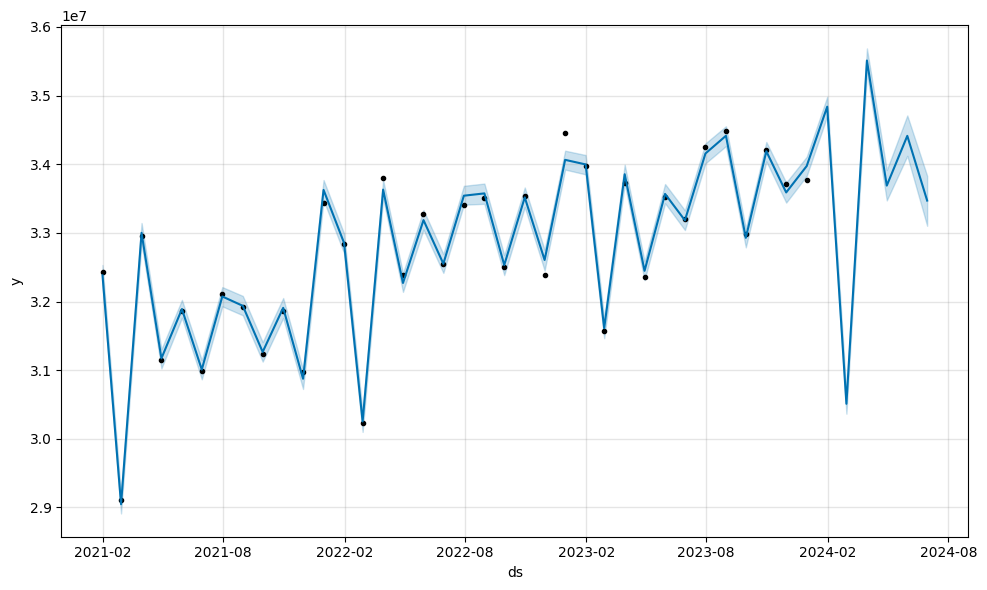

In [ ]:
fig = model.plot(forecast)

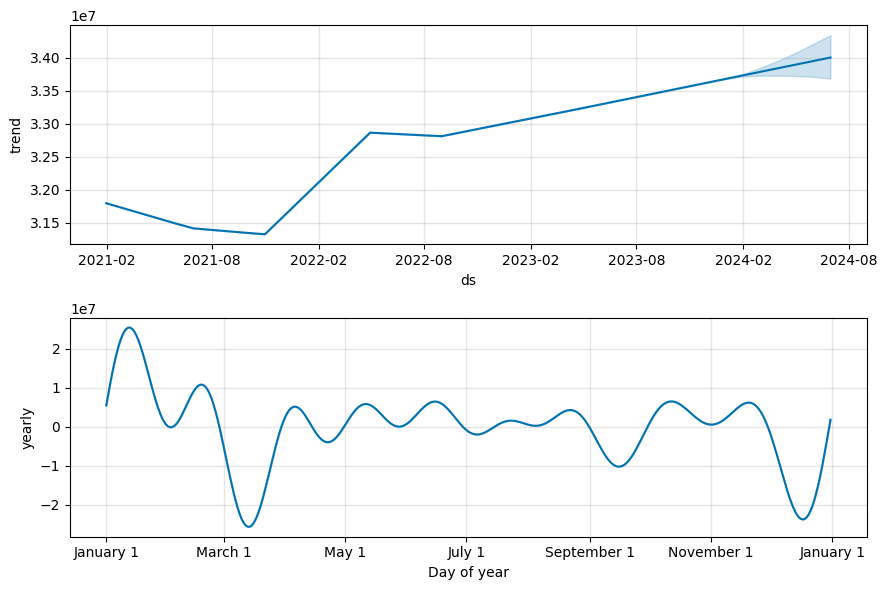

In [ ]:
fig2 = model.plot_components(forecast)

Seasonality Heatmap by Product Category
 Step 1: Extract Month and Category Info

In [ ]:
df['Month_Name'] = df['Order_Date'].dt.strftime('%B')
df['Month_Num'] = df['Order_Date'].dt.month  # for sorting later


 Step 2: Group Data by Category + Month

In [ ]:
monthly_cat_sales = (
    df.groupby(['Category', 'Month_Name', 'Month_Num'])['Total_Price']
    .sum()
    .reset_index()
)


 Step 3: Pivot for Heatmap Format

In [ ]:
pivot_data = monthly_cat_sales.pivot_table(
    index='Category',
    columns='Month_Num',
    values='Total_Price'
)

# Optional: Rename columns to month names
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivot_data.columns = month_order


Step 4: Plot Heatmap

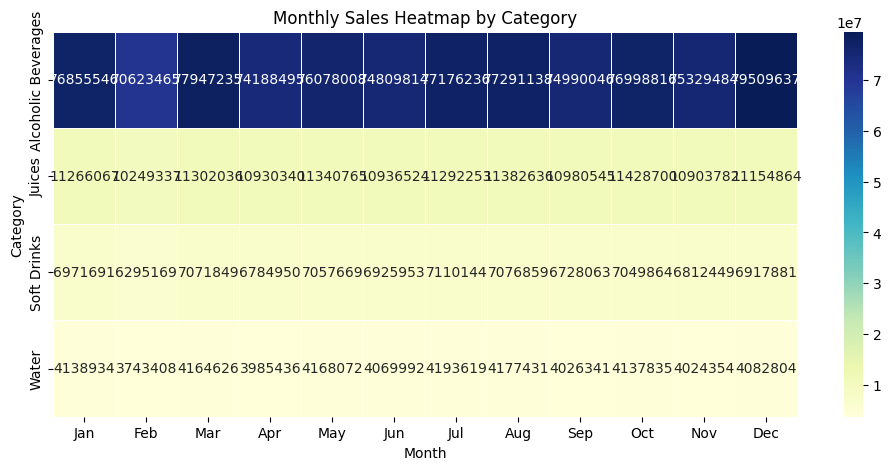

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Monthly Sales Heatmap by Category")
plt.xlabel("Month")
plt.ylabel("Category")
plt.show()


Product Affinity / Bundling Analysis
This will help answer:

Which product combinations are commonly ordered together?

Can we create bundles based on that?

Step 1: Group Products per Order

In [ ]:
from itertools import combinations
from collections import Counter

# Group products by Order_ID
order_products = df.groupby('Order_ID')['Product'].apply(list)

# Create all product pairs (combinations of 2)
pairs = []

for products in order_products:
    if len(products) > 1:
        pairs.extend(combinations(sorted(set(products)), 2))  # remove duplicates within same order

# Count frequency of each product pair
pair_counts = Counter(pairs)

# Convert to DataFrame
pair_df = pd.DataFrame(pair_counts.items(), columns=['Pair', 'Count']).sort_values(by='Count', ascending=False)
pair_df.head(10)


,Pair,Count
57,"(Hohes C Orange, Mango Juice)",37341
39,"(Granini Apple, Hohes C Orange)",37203
472,"(Cranberry Juice, Hohes C Orange)",37125
348,"(Hohes C Orange, Tomato Juice)",36961
254,"(Hohes C Orange, Rauch Multivitamin)",36807
191,"(Hohes C Orange, Passion Fruit Juice)",36787
224,"(Cranberry Juice, Passion Fruit Juice)",35415
225,"(Cranberry Juice, Rauch Multivitamin)",35325
228,"(Passion Fruit Juice, Tomato Juice)",35175
227,"(Granini Apple, Tomato Juice)",35149


Step 2: Optional — Visualize Top Pairs

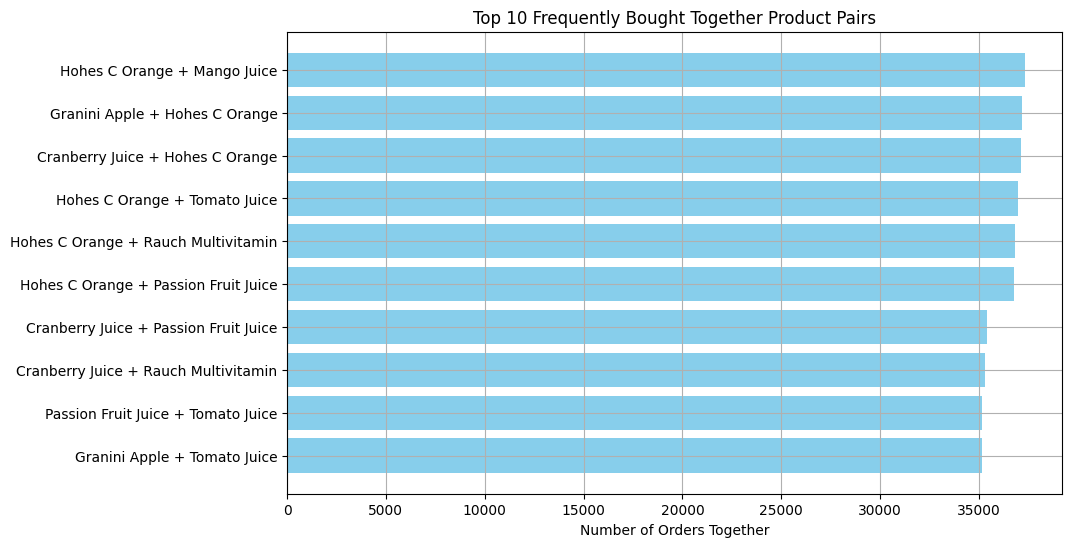

In [ ]:
top_pairs = pair_df.head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh([f"{a[0]} + {a[1]}" for a in top_pairs['Pair']], top_pairs['Count'], color='skyblue')
plt.xlabel("Number of Orders Together")
plt.title("Top 10 Frequently Bought Together Product Pairs")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


Customer Profitability Scoring
Rank customers based on revenue contribution, pricing tolerance, and discount behavior
So we can:

Identify VIPs, loyalists, and low-margin buyers

Customize marketing and retention strategies



#Profitability Scoring Formula
Score = Total_Revenue × Avg_Unit_Price ÷ (1 + Avg_Discount)

Aggregate Customer-Level Metrics

In [ ]:
customer_summary = df.groupby('Customer_ID').agg({
    'Total_Price': 'sum',
    'Unit_Price': 'mean',
    'Discount': 'mean'
}).reset_index()

customer_summary.columns = ['Customer_ID', 'Total_Revenue', 'Avg_Unit_Price', 'Avg_Discount']



 Step 2: Calculate Profitability Score

In [ ]:
customer_summary['Profitability_Score'] = (
    customer_summary['Total_Revenue'] * customer_summary['Avg_Unit_Price']
) / (1 + customer_summary['Avg_Discount'])

# Sort descending
top_customers = customer_summary.sort_values(by='Profitability_Score', ascending=False)
top_customers.head(10)


,Customer_ID,Total_Revenue,Avg_Unit_Price,Avg_Discount,Profitability_Score
3186,CUS3866,367741.61,6.968570,0.085700,2.360351e+06
1325,CUS2190,359547.51,6.996412,0.087554,2.313028e+06
4413,CUS4970,337297.73,7.230054,0.084745,2.248161e+06
4262,CUS4834,340644.61,7.127939,0.081508,2.245101e+06
3868,CUS448,345834.59,6.988460,0.083455,2.230690e+06
4581,CUS5120,356102.09,6.702747,0.084343,2.201205e+06
4084,CUS4674,333145.39,7.147141,0.084068,2.196391e+06
8019,CUS8215,354744.41,6.688824,0.083141,2.190687e+06
9159,CUS9241,353829.40,6.651879,0.082727,2.173798e+06
4456,CUS5008,339270.71,6.903001,0.083368,2.161763e+06


Step 3: Optional — Segment the Customers

In [ ]:
# Add simple tiering
import pandas as pd

top_customers['Tier'] = pd.qcut(top_customers['Profitability_Score'], 4,
                                 labels=['Bronze', 'Silver', 'Gold', 'Platinum'])


Step 4: Visualize Top 10 Customers

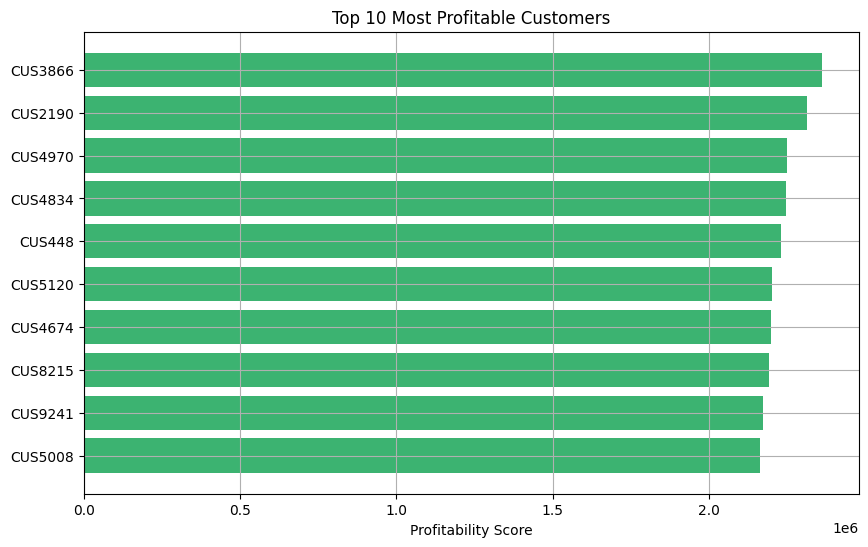

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_10 = top_customers.head(10)
plt.barh(top_10['Customer_ID'], top_10['Profitability_Score'], color='mediumseagreen')
plt.xlabel("Profitability Score")
plt.title("Top 10 Most Profitable Customers")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


Price Sensitivity Segmentation
Group customers based on how their purchasing behavior changes with price variations (discounts, unit price).

Step 1: Aggregate Customer Metrics for Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cust_features = customer_summary[['Avg_Unit_Price', 'Avg_Discount']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cust_features)


Step 2: Run K-Means Clustering (Try k=4)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_summary['Price_Segment'] = kmeans.fit_predict(scaled_features)


Step 3: Visualize the Clusters

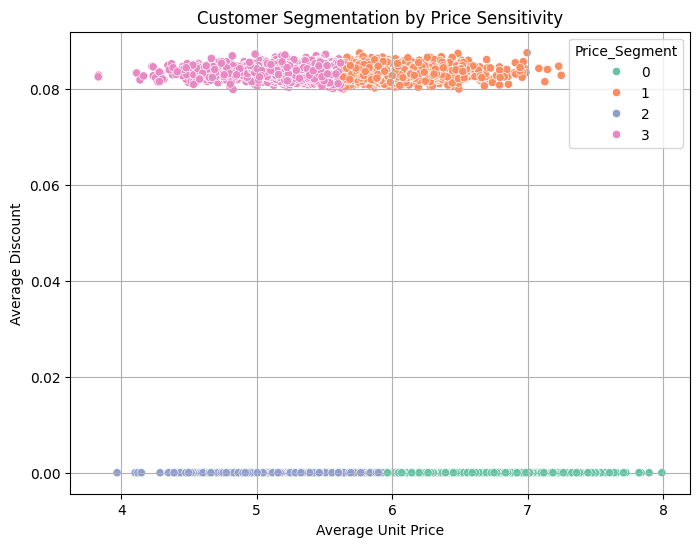

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Avg_Unit_Price', y='Avg_Discount',
    hue='Price_Segment', palette='Set2',
    data=customer_summary
)
plt.title("Customer Segmentation by Price Sensitivity")
plt.xlabel("Average Unit Price")
plt.ylabel("Average Discount")
plt.grid(True)
plt.show()


Repeat Purchase Pattern Detection

In [ ]:
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,...,Year,Month,Week,Day,Day_Name,Month_Name,Order_Weekday,Revenue_per_Unit,Discount_Bin,Month_Num
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,...,2023,8,34,23,Wednesday,August,2,1.493962,5–10%,8
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,...,2023,8,34,23,Wednesday,August,2,1.404000,5–10%,8
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,...,2023,8,34,23,Wednesday,August,2,1.111507,0–5%,8
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,...,2023,8,34,23,Wednesday,August,2,2.897966,5–10%,8
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,...,2023,8,34,23,Wednesday,August,2,0.782857,5–10%,8


Repeat Purchase Pattern Detection

In [ ]:
# Step 1: Create a table of unique customer orders
orders = df[['Customer_ID', 'Order_ID', 'Order_Date']].drop_duplicates()

# Step 2: Sort and calculate reorder intervals
orders = orders.sort_values(['Customer_ID', 'Order_Date'])
orders['Prev_Order_Date'] = orders.groupby('Customer_ID')['Order_Date'].shift(1)
orders['Days_Between_Orders'] = (orders['Order_Date'] - orders['Prev_Order_Date']).dt.days

# Step 3: Compute metrics per customer
repeat_stats = orders.groupby('Customer_ID').agg(
    total_orders=('Order_ID', 'nunique'),
    repeat_orders=('Days_Between_Orders', lambda x: x.notna().sum()),
    avg_days_between=('Days_Between_Orders', 'mean'),
    std_days_between=('Days_Between_Orders', 'std')
).reset_index()

# Step 4: Filter frequent repeat customers
frequent_repeaters = repeat_stats[repeat_stats['repeat_orders'] >= 3].sort_values(by='avg_days_between')

# Show top customers with predictable behavior
frequent_repeaters.head(10)

,Customer_ID,total_orders,repeat_orders,avg_days_between,std_days_between
6040,CUS6434,359,358,3.039106,3.020682
6064,CUS6456,359,358,3.041899,2.923090
463,CUS1414,357,356,3.044944,3.092599
3116,CUS3802,357,356,3.056180,3.220041
4247,CUS4820,358,357,3.061625,3.295658
4105,CUS4693,356,355,3.064789,3.334255
5790,CUS6209,355,354,3.067797,3.004422
9526,CUS9572,354,353,3.067989,3.037815
9279,CUS935,354,353,3.079320,3.168461
5161,CUS5643,354,353,3.079320,2.888938


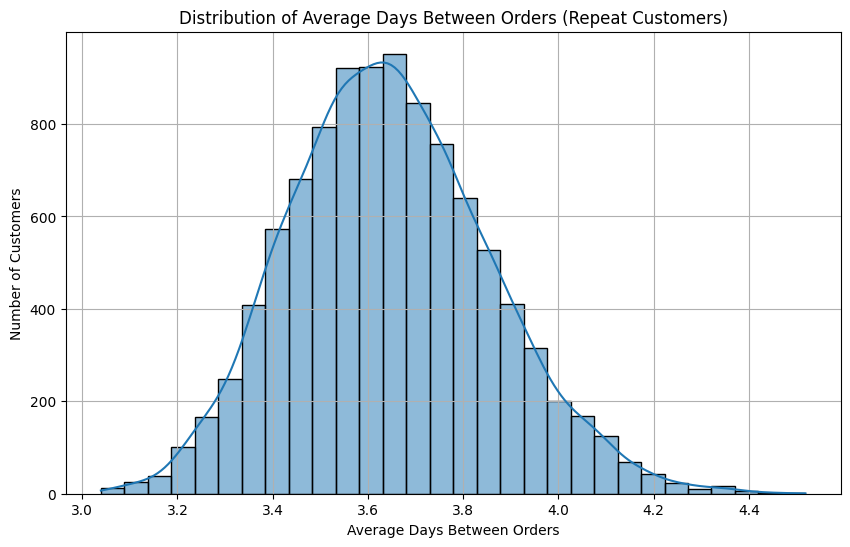

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(frequent_repeaters['avg_days_between'], bins=30, kde=True)
plt.title('Distribution of Average Days Between Orders (Repeat Customers)')
plt.xlabel('Average Days Between Orders')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


Customer Segment Labels by Reordering Behavior
This will help you profile customers as:

🔁 Frequent Reorderers

⏳ Moderate Buyers

🧊 Slow/Occasional Buyers



In [ ]:
#q1 = frequent_repeaters['avg_days_between'].quantile(0.33)
#q2 = frequent_repeaters['avg_days_between'].quantile(0.66)

#def label_reorder_segment(row):
#    if row['avg_days_between'] <= 3.7:
#        return 'Frequent Buyer'
#   elif row['avg_days_between'] <= 4:
#       return 'Moderate Buyer'
#   else:
#       return 'Occasional Buyer'

mean = frequent_repeaters['avg_days_between'].mean()
std = frequent_repeaters['avg_days_between'].std()

def label_reorder_segment(row):
    if row['avg_days_between'] <= mean - std:
        return 'Very Frequent'
    elif row['avg_days_between'] <= mean:
        return 'Frequent'
    elif row['avg_days_between'] <= mean + std:
        return 'Occasional'
    else:
        return 'Rare'

frequent_repeaters['Reorder_Segment'] = frequent_repeaters.apply(label_reorder_segment, axis=1)

# Count customers in each segment
segment_counts = frequent_repeaters['Reorder_Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Number of Customers']
segment_counts


,Segment,Number of Customers
0,Frequent,3601
1,Occasional,3195
2,Very Frequent,1602
3,Rare,1602


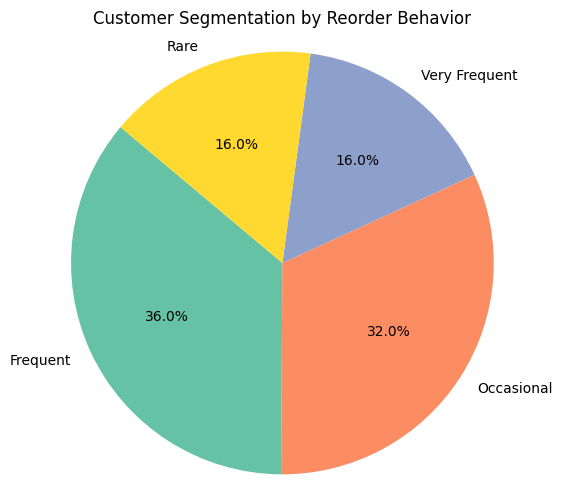

In [ ]:
import matplotlib.pyplot as plt

colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#ffd92f']  # Add 4th color
plt.figure(figsize=(6,6))
plt.pie(segment_counts['Number of Customers'],
        labels=segment_counts['Segment'],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors)
plt.title('Customer Segmentation by Reorder Behavior')
plt.axis('equal')
plt.show()


What-If Inventory & Discount Simulation

        Scenario  Total_Quantity  Total_Revenue
0  -10% Discount    8.560464e+07   5.537844e+08
1   -5% Discount    1.291706e+08   7.988720e+08
2   +5% Discount    4.303121e+08   2.304608e+09
3  +10% Discount    6.523830e+08   3.300249e+09
               Product  Avg_Daily_Q  Forecast_30_Days
0       Hohes C Orange  7131.005489     213930.164684
1         Tomato Juice  6766.083257     202982.497713
2        Granini Apple  6764.146386     202924.391583
3      Cranberry Juice  6752.827996     202584.839890
4  Passion Fruit Juice  6745.032022     202350.960659
5   Rauch Multivitamin  6735.475755     202064.272644
6          Mango Juice  6723.795059     201713.851784
7       San Pellegrino  5429.752059     162892.561757
8               Vittel  5417.279048     162518.371455
9          Apollinaris  5279.569991     158387.099726


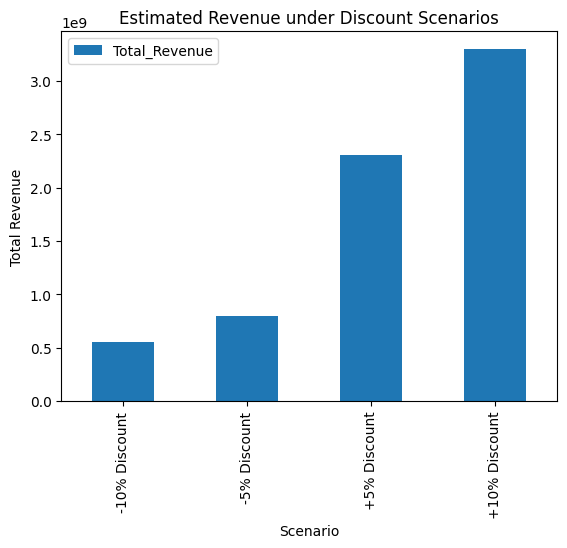

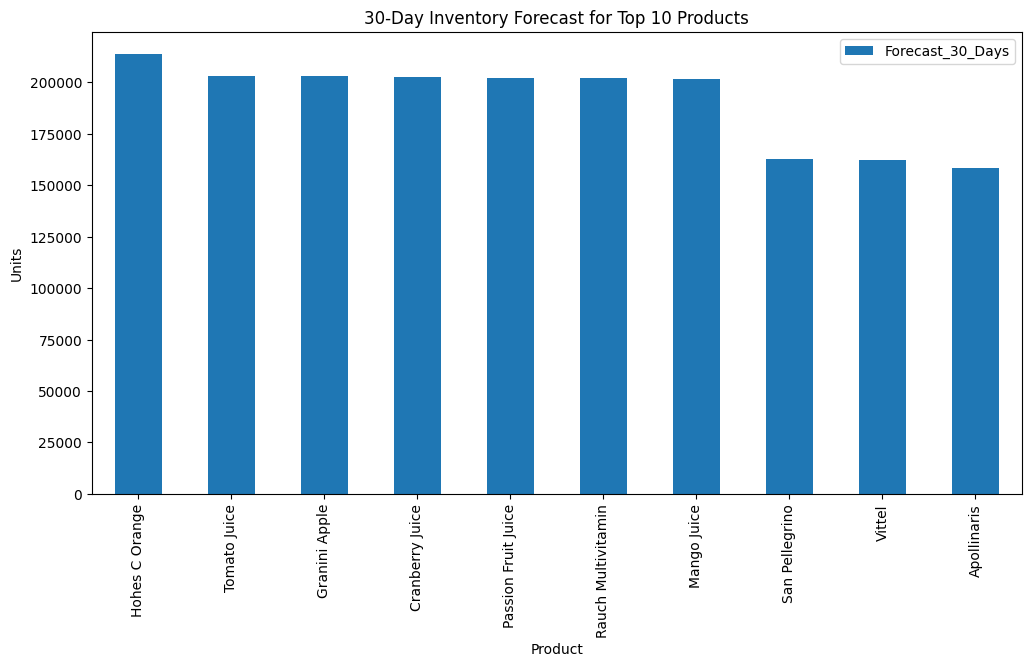

In [ ]:
# Prepare data for regression
df['Revenue'] = df['Unit_Price'] * df['Quantity'] * (1 - df['Discount'])

X = df[['Unit_Price', 'Discount']]
y = df['Quantity']

model = LinearRegression()
model.fit(X, y)

results = []
for delta in [-0.10, -0.05, 0.05, 0.10]:
    df['Temp_Discount'] = (df['Discount'] + delta).clip(0, 0.5)
    df['Pred_Quantity'] = model.predict(df[['Unit_Price', 'Temp_Discount']].rename(columns={'Temp_Discount': 'Discount'}))
    df['Pred_Revenue'] = df['Unit_Price'] * df['Pred_Quantity'] * (1 - df['Temp_Discount'])

    results.append({
        'Scenario': f'{delta:+.0%} Discount',
        'Total_Quantity': df['Pred_Quantity'].sum(),
        'Total_Revenue': df['Pred_Revenue'].sum()
    })


sim_df = pd.DataFrame(results)
print(sim_df)

# Inventory forecast (next 30 days) for top products
avg_daily = df.groupby('Product')['Quantity'].sum() / ((df['Order_Date'].max() - df['Order_Date'].min()).days)
inv_df = avg_daily.sort_values(ascending=False).head(10).reset_index()
inv_df.columns = ['Product', 'Avg_Daily_Q']
inv_df['Forecast_30_Days'] = inv_df['Avg_Daily_Q'] * 30
print(inv_df)

# Optional visualizations
sim_df.plot.bar(x='Scenario', y='Total_Revenue', title='Estimated Revenue under Discount Scenarios')
plt.ylabel('Total Revenue')

inv_df.plot.bar(x='Product', y='Forecast_30_Days', title='30-Day Inventory Forecast for Top 10 Products', figsize=(12,6))
plt.ylabel('Units')
plt.show()

In [ ]:
df.to_csv("beverage_dashboard_data.csv", index=False)

In [ ]:
df.to_csv("main_data.csv", index=False)
monthly_sales.to_csv("monthly_sales.csv", index=False)
top_products.to_csv("top_products.csv")
promo_summary.to_csv("promo_summary.csv", index=False)
sim_df.to_csv("discount_simulation.csv", index=False)
pivot_data.to_csv("category_heatmap.csv")
top_customers.to_csv("top_customers.csv", index=False)
customer_summary.to_csv("customer_summary.csv", index=False)
frequent_repeaters.to_csv("frequent_repeaters.csv", index=False)
forecast[['ds', 'yhat']].to_csv("forecast.csv", index=False)
inv_df.to_csv("inventory_forecast.csv", index=False)


In [ ]:
top_customers_filtered = customer_summary.sort_values(by='Profitability_Score', ascending=False).head(10)
top_customers_filtered['Tier'] = pd.qcut(top_customers_filtered['Profitability_Score'], 4, labels=['Bronze', 'Silver', 'Gold', 'Platinum'])
top_customers_filtered.to_csv("top_customers.csv", index=False)


In [ ]:
frequent_repeaters_filtered = frequent_repeaters[
    frequent_repeaters['Reorder_Segment'] == "Very Frequent"].copy()
frequent_repeaters_filtered.to_csv("frequent_repeaters.csv", index=False)


In [ ]:
from itertools import combinations
from collections import Counter

order_products = df.groupby('Order_ID')['Product'].apply(list)
pairs = []

for products in order_products:
    if len(products) > 1:
        pairs.extend(combinations(sorted(set(products)), 2))

pair_counts = Counter(pairs)
pair_df = pd.DataFrame(pair_counts.items(), columns=['Pair', 'Count']).sort_values(by='Count', ascending=False)
pair_df['Pair_Label'] = pair_df['Pair'].apply(lambda x: f"{x[0]} + {x[1]}")
pair_df.to_csv("product_pairs.csv", index=False)
